# Data Understanding

Data yang digunakan adalah dataset “Stroke Predictions” yang diambil dari website Kaggle.com. Pada tahapan ini, kita akan melihat isi dari dataset yang kita pakai baik dari attribut maupun dimensi dari dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [ ]:
# load the dataset
url = 'https://raw.githubusercontent.com/Liszt87/Machine-Learning-Project/main/Stroke_Predictions/healthcare-dataset-stroke-data.csv'
strokes = pd.read_csv(url)
strokes

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Seperti yang bisa kita lihat bahwa dataset ini memiliki 12 attribute dan dimensi (5110, 12), artinya dataset ini memiliki 5110 sample pada 12 attribut.

Kita akan melanjutkan untuk melihat informasi apa saja yang kita bisa dapatkan dari dataset tersebut dengan menggunakan fungsi info().

In [ ]:
#Melihat Informasi dataset
strokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Perhatikan bahwa dalam dataset ini memiliki 5 tipe data object, 4 tipe data int64, dan tipe data float64. Hampit dari setiap attribut memiliki 5110 sample, kecuali attribut bmi yang memiliki 4909 sample. Hal ini disebabkan terdapat nilai yang bernilai NaN sehingga jumlahnya tidak sama dengan yang lain. Masalah tersebut akan diselesaikan pada bagian EDA untuk menangani masalah Missing Value.

# Exploratory Data Analysis

Pada tahap ini, kita akan mengeksplor data dengan membuat visualnya. Dari pembuatan visual tersebut kita dapat mengetahui maksud dari data dan hubungan antar attribut serta kita dapat menanangani masalah pada data, seperti Missing Value issues.

## EDA - Deskripsi Variabel

Dataset ini memiliki 5110 sampel dan memiliki 12 kolom atribut, yaitu :
1.	id : Identifikasi individu yang unik.
2.	gender : Gender suatu individu, seperti “male, female, dan other”
3.	age : Umur Individu.
4.	hypertension : 1 jika individu mengalami hipertensi dan 0 jika tidak.
5.	heart_disease : 1 jika individu mengalami gangguan hati dan 0 jika tidak.
6.	ever_married : Suatu individu pernah manikah atau tidak.
7.	work_type : Jenis-jenis pekerjaan yang dilakukan suatu indvidu, seperti bekerja di pemerintahan, tidak bekerja, wirasuaha, dan private.
8.	Residence_type : Individu tinggal di daerah Urban atau Rural.
9.	avg_glucose_lvl : Tingkat rata-rata glukosa dalam darah.
10.	bmi : Index berat badan.
11.	smoking_status : Status individu, seperti perokok aktif, tidak pernah merokok, tidak diketahui, dan pernah merokok sebelumnya.
12.	stroke : 1 jika individu berpotensial terkena stroke dan 0 jika tidak.


Pada tahap ini, kita akan meilhat deskripsi variabel dari segi statistika pada fitur numerikal dengan menggunakan fungsi describe().

In [ ]:
#Melihat deskipsi variabel dari segi statistika
strokes.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Menangani Masalah Data

Seperti yang sudah dijelaskan sebelumnya, kita menemukan nilai NaN pada attribut bmi dan disnilah kita akan menangani masalah tersebut.

Memeriksa berapa banyak nilai NaN pada setiap attribute.

In [ ]:
#Melihat jumlah nilai NaN pada setiap attribute.
strokes.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Dari hasil diatas, kita mendapatkan informasi bahwa terdapat 201 nilai NaN pada attribute bmi.

Untuk menangani masalah ini, maka kita akan mengisi nilai-nilai tersebut dengan pendekatan statistika. Disini saya menggunakan nilai mean untuk mengisi nilai yang kosong. Alasannya adalah karena attribut ini memiliki nilai numerik dan memiliki korelasi yang kecil jika kita pikir secara nyata dengan attribute lain.

In [ ]:
strokes['bmi'].fillna(strokes['bmi'].mean(),inplace=True)
strokes['bmi'].isnull().sum()

0

Setelah melakukan pengisian nilai dengan mean, kita mencoba untuk memeriksanya kembali apakah terdapat nilai NaN yang masih tersisa. Perhatikan bahwa hasil yang diperoleh setelah diperiksa adalah nol sehingga kita bisa simpulkan tidak ada nilai NaN lagi pada attribute bmi.

Kita akan periksa lagi apakah terdapat nilai yang berubah dalam segi statistik pada attribute bmi berubah dengan fungsi describe().

In [ ]:
strokes.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Perhatikan bahwa terdapat nilai yang berubah setelah kita mengisikan nilai dengan mean, misal pada std yang semula adalah 7.854067 menjadi 7.698018.

## EDA - Univariate Analysis

Pada tahap ini kita akan mengeksplorasi informasi dari tiap attribute. Data akan divisualisasikan dengan bar chart untuk attribut kategorikal dan histogram untuk attribute numerikal. Tahap ini juga akan melihat banyak jumlah tiap kelas pada tiap attribute

In [ ]:
numerical_features = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

**Fitur Kategorikal**

        jumlah sampel  persentase
Female           2994        58.6
Male             2115        41.4
Other               1         0.0


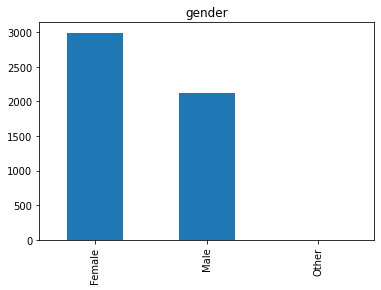

In [ ]:
#Fitur gender
feature = categorical_features[0]
count = strokes[feature].value_counts()
percent = 100*strokes[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
Yes           3353        65.6
No            1757        34.4


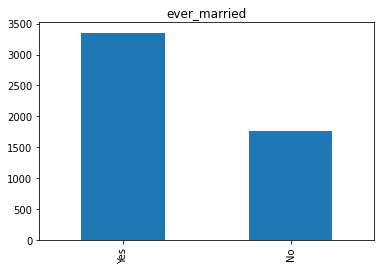

In [ ]:
#Fitur ever_married
feature = categorical_features[1]
count = strokes[feature].value_counts()
percent = 100*strokes[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

               jumlah sampel  persentase
Private                 2925        57.2
Self-employed            819        16.0
children                 687        13.4
Govt_job                 657        12.9
Never_worked              22         0.4


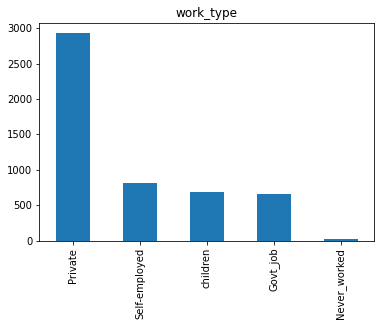

In [ ]:
#Fitur work_type
feature = categorical_features[2]
count = strokes[feature].value_counts()
percent = 100*strokes[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

       jumlah sampel  persentase
Urban           2596        50.8
Rural           2514        49.2


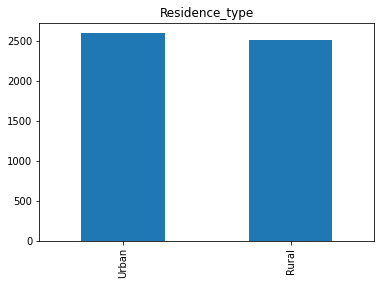

In [ ]:
#Fitur residence_type
feature = categorical_features[3]
count = strokes[feature].value_counts()
percent = 100*strokes[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                 jumlah sampel  persentase
never smoked              1892        37.0
Unknown                   1544        30.2
formerly smoked            885        17.3
smokes                     789        15.4


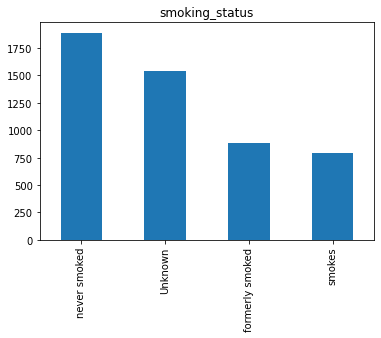

In [ ]:
#Fitur smoking_status
feature = categorical_features[4]
count = strokes[feature].value_counts()
percent = 100*strokes[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari hasil diatas, kita dapatkan berapa banyak kelas tiap attribute dan berapa banyak jumlahnya tiap kelas pada tiap attribute. Pada attribute gender, memiliki 3 gender yang mana ini meruapakan hal yang aneh untuk kita. Masalah ini akan kita selesaikan diakhir tahap EDA.

**Fitur Numerikal**

Sama seperti sebelumnya, kita akan melihat jumlah kelas dari tiap attribute. Tetapi, karena ini data numerikal maka kita akan lebih memperhatikannya dengan pendekatan statistika. Perhatikan bahwa selain attribute avg_glucose_lvl dan bmi memiliki bentuk yang tidak beraturan. Sedangkan, 2 attribute yang disebutkan tadi memiliki makna statistik yang akan berpengaruh dalam transformasi data dan pembuatan model. Perhatikan juga bahwa terdapat ketidakseimbangan data pada attribute stroke dimana ini akan berakibat pada performa model dan hasil prediksi. Masalah tersebut akan diselesaikan pada tahap Transfromasi data

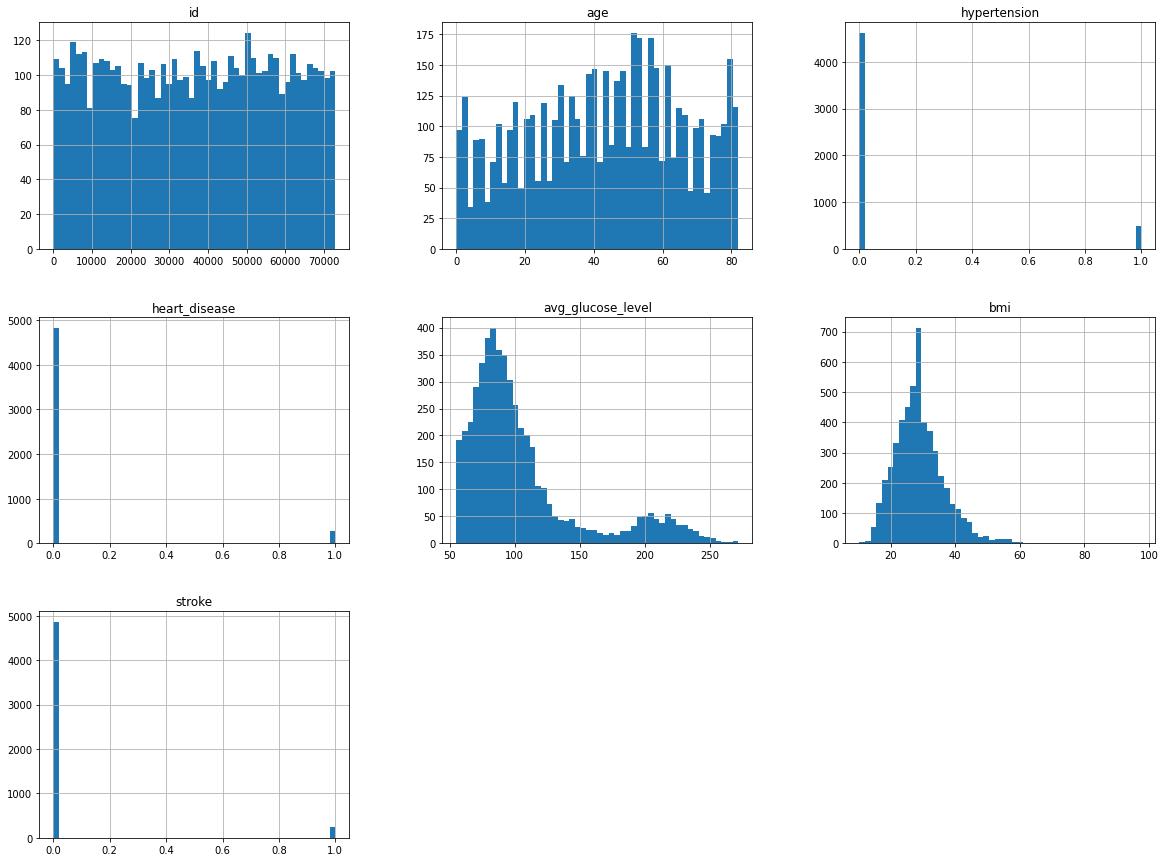

In [ ]:
strokes.hist(bins=50, figsize=(20,15))
plt.show()

## EDA - Multivariate Analysis

Pada tahapan ini, kita akan meilhat hubungan antara tiap fitur dengan label, yaitu stroke. Untuk fitur kategorikal kita akan menganalisis apakag tiap kelas mempengaruhi banyaknya orang yang terkena strokes. Hal yang sama juga akan kita lakukan pada fitur numerikal tetapi kita akan melihat korelasi tiap fitur dengan label agar kita bisa memilih fitur mana yang akan berguna untuk pembuatan model nantinya.

**Fitur Kategorikal**

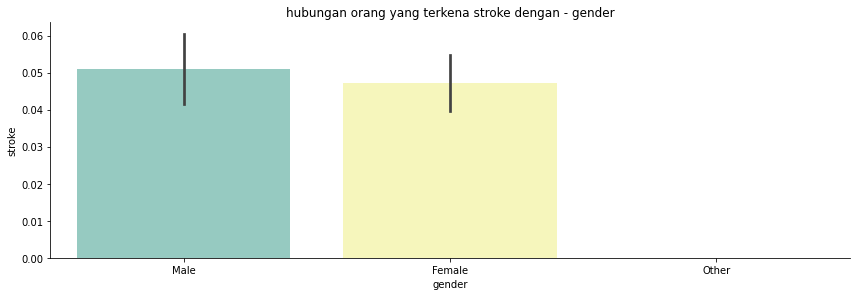

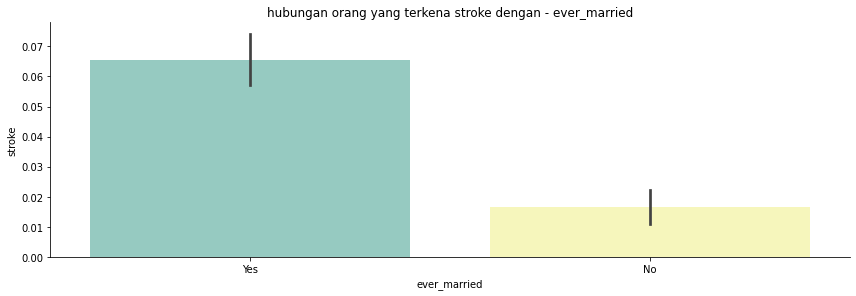

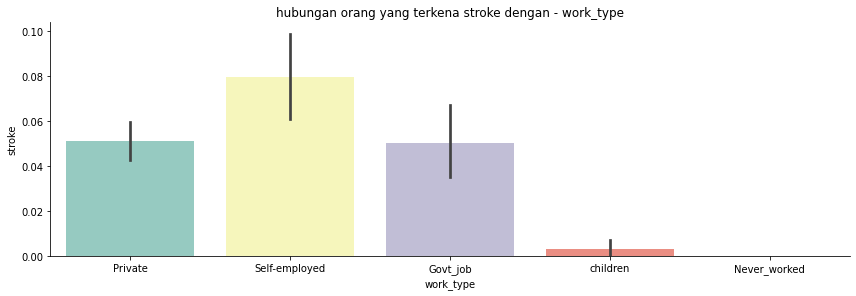

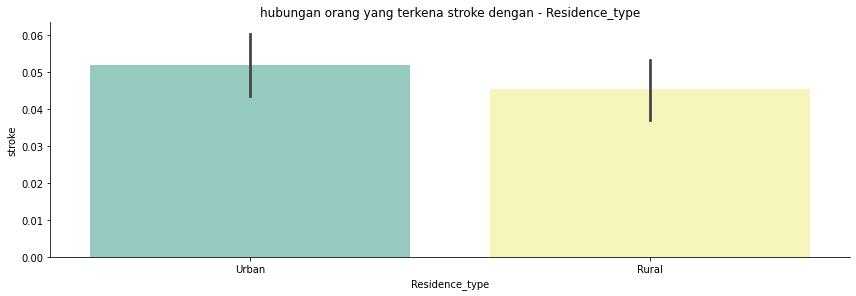

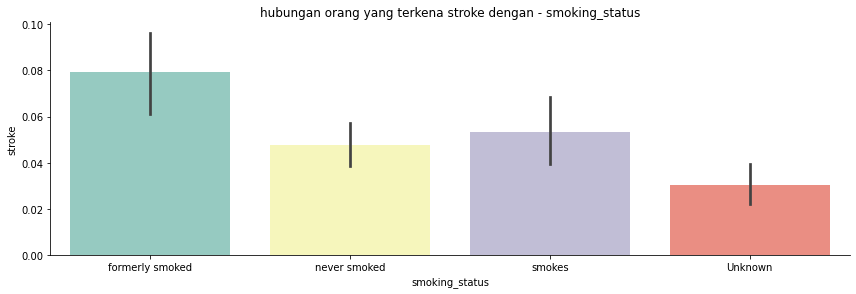

In [ ]:
#Membuat bar chart tiap attribute kategorikal
cat_features = strokes.select_dtypes(include='object').columns.to_list()
     
for col in categorical_features:
  sns.catplot(x=col, y="stroke", kind="bar", dodge=False, height = 4, aspect = 3,  data=strokes, palette="Set3")
  plt.title("hubungan orang yang terkena stroke dengan - {}".format(col))

Perhatikan bahwa hubungan stroke antar kelas tiap attribute memiliki efek yang kecil, kecuali pada attribute work_tyoe dan residence type. Namun, karena memiliki pengaruh walaupun kecil maka kita akan memasukkannya sebagai fitur nantinya.

**Fitur Numerikal**

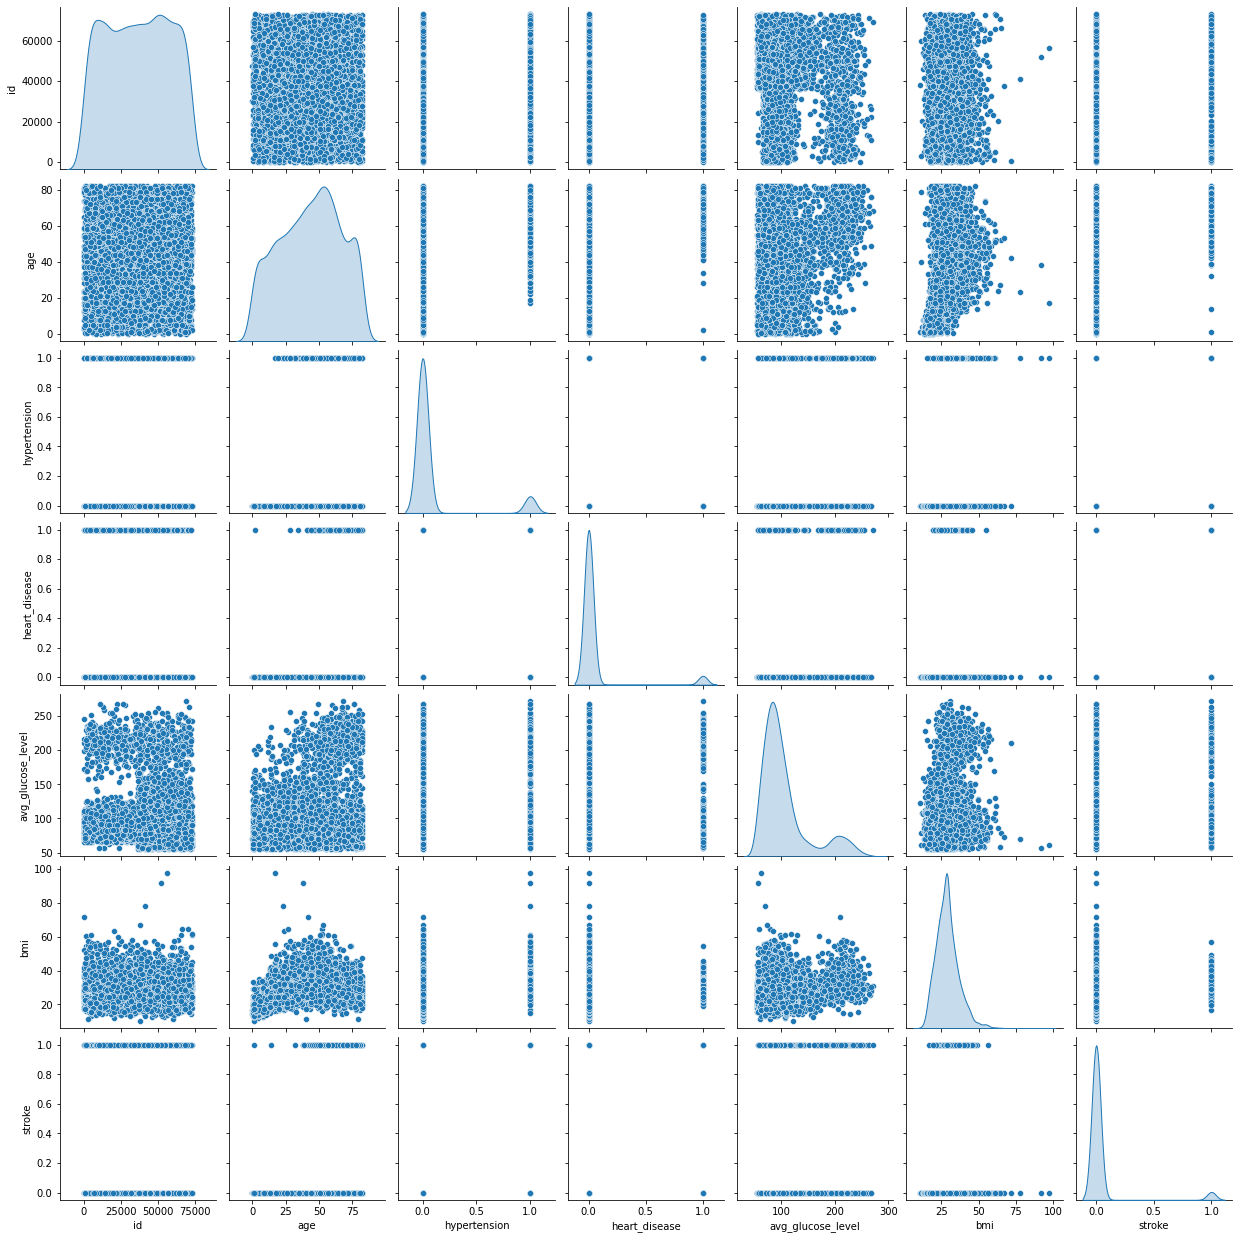

In [ ]:
sns.pairplot(strokes, diag_kind = 'kde')

Dengan melihat pairplot diatas, kita sulit menentukan fitur mana yang memiliki korelasi tinggi untuk dijadikan fitur. Oleh karena itu, kita akan melihatnya lebuh lanjut dengan menggunakan Correlation Matriks untuk melihat seberapa besar hubungan tiap fitur numerikal terhadap label.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

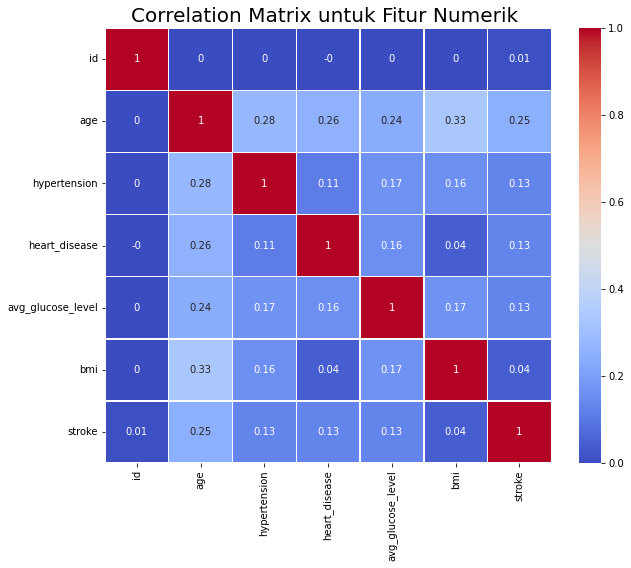

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = strokes.corr().round(2)
     
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Perhatikan bahwa hubungan antar fitur dan label bisa dikatakan kecil tetapi karena masalah tersebut maka kita akan semua fitur berdasarkan fakta real di dunia nyata sehingga attribute id akan di drop karena tidak memiliki efek apapun terhadap label.

# Data Preparation

Pada tahap ini, kita akan melakukan transformasi data agar data yang digunakan untuk model jaul lebih baik dan meningkatkan performa model. Transformasi data yang akan dilakukan antara lain adalah Menghilangkan Attribut Yang Tidak Dipakai & Menghilangkan Suatu Kelas Pada Suatu Attirbute ,Encoding terhadap fitur kategorikal, data balancing, splitting data, dan standarisasi.

**Menghilangkan Attribut Yang Tidak Dipakai & Menghilangkan Suatu Kelas Pada Suatu Attirbute**

Dari hasil EDA yang sudah kita lakukan, kita mendapatkan informasi yang kita butuhkan dan dapat memutuskan fitur yang mana yang akan dipakai. Namun, kita menemukan attribute yang dirasa kurang berguna untuk dijadikan fitur, yaitu attribute id. Alasannya adalah secara fakta id tidak ada hubungannya dengan kondisi individu terkena stroke atau tidak dan karena kita sudah menentukan korelasi tiap fitur numerik terhadap attribute stroke maka kita ketahui bahwa attribute tersebut memiliki tingkat korelasi yang rendah anatar attribute id dan stroke.

Kita juga menemukan kelas yang menurut kita adalah anomaly, misalkan pada attribute gender. Pada attribute tersebut, kita menemukan 3 gender tetapi kita ketahui bahwa di dunia ini terdapat 2 gender saja, yaitu laki-laki dan wanita.

Dari 2 permasalahan yang kita dapat, kita dapat melakukan dropping attribute untuk id dan menghilangkan sample yang memiliki kelas gender Other. Teknik yang digunakan untuk melakukan hal tersebut sangat sederhana. Kita hanya perlu melakukan drop pada attribute dengan menggunakan fungsi drop() dengam parameter ['id'], inplace = True, axis = 1. Dengan menggunakan fungsi dan parameter tersebut kita berhasil menghilangkan semua data pada attribute ID.

Untuk menghilangkan kelas other pada attribute gender maka kita perlu menghilangkannya dengan cara memanggil dataset strokes dengan parameter "strokes.gender != 'Other" sehingga kita dapat menghilangkan data dari baris yang mengandung gender other.

In [ ]:
#Menghilangkan attribute drop dari dataset
strokes.drop(['id'], inplace=True, axis=1)

#menghilangkan kelas other pada attribute gender
strokes = strokes[strokes.gender != 'Other'] 
strokes.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


**Encoding Fitur Kateogrikal**

Kita ketahui bahwa dalam tiap fitur kategorikal memiliki kelas yang berbeda-beda jumlahnya sehingga untuk melakukan encoding terhadap fitur tersebut tidak boleh sembarangan. Maka dari itu kita akan menggunakan teknik yang berbeda terhadap untuk kasus kelas biner maupun lebih.

Untuk fitur yang memiliki kelas sebanyak dua kita bisa menggunakan teknik preprocessing pada library sklearn. Teknik ini akan membuat nilai kategorikal menjadi nilai biner.

In [ ]:
#Encoding data kategorikal untuk fitur yang memiliki 2 kelas
from sklearn import preprocessing
object_col = ["gender", "ever_married" ,"Residence_type"]
label_encoder = preprocessing.LabelEncoder()
for col in object_col:
    strokes[col]=  label_encoder.fit_transform(strokes[col])

strokes.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1


Untuk kasus fitur yang memiliki lebih dari 2 kelas maka kita bisa menggunakan fungsi get_dummies() dari library pandas. get_dummies() digunakan untuk manipulasi data. fungsi ini dapat mengubah data kategoris menjadi variabel dummy atau indikator. 



In [ ]:
#Memainpulasi data kategorikal menjadi variabel dummy dengan pandas
strokes = pd.get_dummies(strokes)
strokes.head(2)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0


**Membagi data Input dan Output**

In [ ]:
X = strokes.drop(["stroke"],axis =1)
y = strokes["stroke"]

**Teknik SMOTE**

Kita ketahui bahwa dari tahapan EDA kita mendapatkan informasi bahwa terdapat ketidakseimbangan pada jumlah kelas pada attribute strokes. Hal ini akan mengakibatkan pada performa model yang tidak bisa memprediksi dengan baik. Oleh karena itu, kita akan menggunakan teknik SMOTE untuk mengatasi imbalancing data.

In [ ]:
#Penggunaan SMOTE pada imbalancing data stroke
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(5109, 17)
Shape of X after SMOTE:(9720, 17) 


Target Class distributuion before SMOTE:
0    0.951262
1    0.048738
Name: stroke, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: stroke, dtype: float64


Perhatikan bahwa presentase kelas pada attribute stroke sekarang sudah seimbang dikarenakan kita menggunakan SMOTE pada data kita untuk menyeimbangkan data.

**Splitting Data**

Sebelum data digunakan untuk model, kita harus membagi data menjadi data train dan data test. Pembagian data akan menggunakan train_test_split dari library sklearn.model_selection. Untuk pembagian porsi datanya kita akan membuat train data memiliki porsi sebesar 80% dan data test sebesar 20% serta random state yang dipakai adalah 777.

In [ ]:
#Splitting data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = .2, random_state = 777)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5109
Total # of sample in train dataset: 7776
Total # of sample in test dataset: 1944


**Standarisasi**

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn untuk melakukan standarisasi

In [ ]:
#standarisasi data training dan test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model

Pada tahap ini kita akan membuat model untuk prediksi stroke. Model yang akan kita gunakan adalah KNN, Random Forest, Boosting Algorithm. Karena ini bukan masalah regresi maka kita akan menggunaan versi classifier untuk pembuatannya.

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

**K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score     

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
prediksi1 = knn.predict(X_test)
     
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)
acc1 = accuracy_score(y_test, prediksi1)
print('Testing-set Accuracy score is:', acc1)
print('Training-set Accuracy score is:',accuracy_score(y_train,knn.predict(X_train)))

Testing-set Accuracy score is: 0.9470164609053497
Training-set Accuracy score is: 0.9522890946502057


**Random Forest**

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier
     
# buat model prediksi
RF = RandomForestClassifier(random_state=777)
RF.fit(X_train, y_train)
prediksi2 = RF.predict(X_test)
     
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)         
acc2 = accuracy_score(y_test, prediksi2)
print('Testing-set Accuracy score is:', acc2)
print('Training-set Accuracy score is:',accuracy_score(y_train,RF.predict(X_train)))

Testing-set Accuracy score is: 0.9691358024691358
Training-set Accuracy score is: 1.0


**Boosting Algorithm**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier                 
     
boosting = GradientBoostingClassifier()                            
boosting.fit(X_train, y_train)
prediksi3 = boosting.predict(X_test)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)
acc3 = accuracy_score(y_test, prediksi3)
print('Testing-set Accuracy score is:', acc3)
print('Training-set Accuracy score is:',accuracy_score(y_train,boosting.predict(X_train)))

Testing-set Accuracy score is: 0.9449588477366255
Training-set Accuracy score is: 0.9513888888888888


# Evaluasi Model

Pada tahap ini, kita akan melakukan pengevaluasian model dengan cara melihat metriks-metriks yang digunakan. Hal ini dikarenakan kita akan memilih performa model yang terbaik dengan melihat metriks yang dihasilkan. Metriks yang digunakan antara lain adalah MSE, akurasi, presisi, recall, dan F1

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,0.000048,0.000053
RF,0.0,0.000031
Boosting,0.000049,0.000055


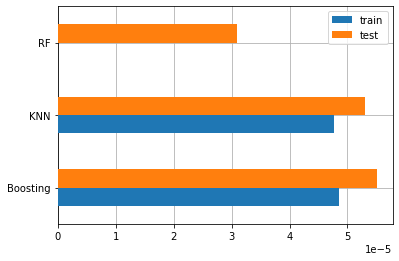

In [ ]:
#Plotting MSE untuk train dan test tiap model
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Perhatikan bahwa MSE terkecil dimiliki oleh model dari Random Forest, artinya model tersebut memiliki potensi kecil untuk melakukan kesalahan prediksi. Selanjutnya kita akan mengevaluasi dari segi metriks akurasi, presisi, recall, dan F1.

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
report1 = classification_report(y_test, prediksi1)
print(report1)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       957
           1       0.96      0.93      0.95       987

    accuracy                           0.95      1944
   macro avg       0.95      0.95      0.95      1944
weighted avg       0.95      0.95      0.95      1944



In [ ]:
report2 = classification_report(y_test, prediksi2)
print(report2)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       957
           1       0.98      0.96      0.97       987

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944



In [ ]:
report3 = classification_report(y_test, prediksi3)
print(report3)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       957
           1       0.96      0.93      0.94       987

    accuracy                           0.94      1944
   macro avg       0.95      0.95      0.94      1944
weighted avg       0.95      0.94      0.94      1944



Perhatikan bahwa Random Forest tetap menjadi model yang terbaik diantara ketiga lainnya. Hal ini dikarenakan model tersebut dapat memprediksi kelas dari attribute stroke dengan akurasi, presisi, recall, dan F1 yang cukup tinggi. Kesimpulannya, model yang memiliki performa terbaik dimiliki oleh **Random Forest.**